<a href="https://colab.research.google.com/github/Radu1999/Regression-algorithms/blob/main/Tema2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset retrieval

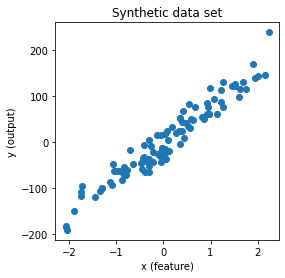

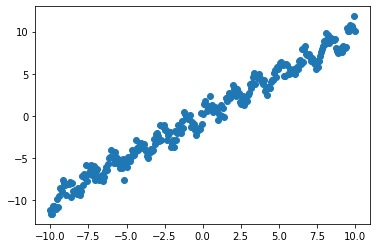

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


# Simple dataset
n_samples = 100
n_features = 1
noise = 20
X, y = datasets.make_regression(n_samples=n_samples, n_features=n_features, n_informative=1, noise=noise, random_state=37)
fig = plt.figure(figsize=(4, 4))
plt.xlabel("x (feature)")
plt.ylabel("y (output)")
plt.title("Synthetic data set")
plt.scatter(X, y)
plt.show()

# Complex dataset
n_samples = 300
x = np.linspace(-10, 10, n_samples) # coordinates
noise_sample = np.random.normal(0,0.5,n_samples)
sine_wave = x + np.sin(4*x) + noise_sample
plt.plot(x, sine_wave, 'o');
plt.show()

Closed form solution


In [ ]:
class LinearRegression(object):

    def fit(self, X, t):
        self.t = t
        self.w = np.linalg.pinv(X) @ t

    def predict(self, X):
        self.y = X @ self.w
        return self.y
    
    def get_error(self, predicted, true, type_error):
        if type_error == "MSE":
          return np.mean(np.square(predicted - true))
        if type_error == "RMSE":
          return np.sqrt(np.mean(np.square(predicted - true)))

def extract_polynomial_features(X, M):
    phi = np.array(list(map(lambda x: x ** range(M + 1), X)))
    return phi

Error for training MSE: 494.0854987342918
Error for training RMSE: 22.228034072636557
Error for testing MSE: 394.60320009755213
Error for testing RMSE: 19.864621821156128


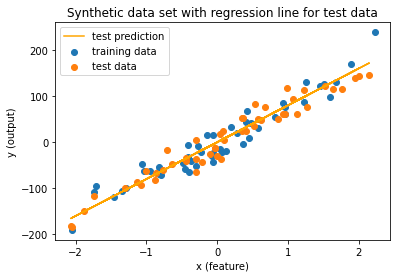

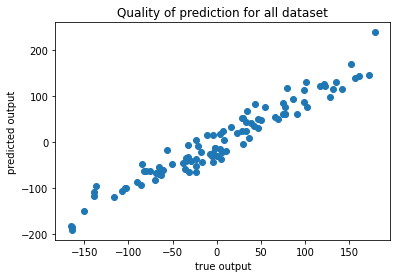

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5)

X_train_feat = extract_polynomial_features(X_train, 1)
X_test_feat = extract_polynomial_features(X_test, 1)

model = LinearRegression()
model.fit(X_train_feat, y_train)

predict_train = model.predict(X_train_feat)
print(f'Error for training MSE: {model.get_error(predict_train, y_train, "MSE")}')
print(f'Error for training RMSE: {model.get_error(predict_train, y_train, "RMSE")}')

predict_test = model.predict(X_test_feat)
print(f'Error for testing MSE: {model.get_error(predict_test, y_test, "MSE")}')
print(f'Error for testing RMSE: {model.get_error(predict_test, y_test, "RMSE")}')





plt.scatter(X_train, y_train, label="training data")
plt.xlabel("x (feature)")
plt.ylabel("y (output)")
plt.title("Synthetic data set with regression line for test data")
plt.plot(X_test, predict_test, label="test prediction", color="orange")
plt.scatter(X_test, y_test, label="test data")
#plt.plot(X_train, predict_train, label="trained prediction", color="red")
plt.legend()
plt.show()


X_feat = extract_polynomial_features(X, 1)
predict = model.predict(X_feat)
plt.scatter(predict, y)
plt.xlabel("true output")
plt.ylabel("predicted output")
plt.title("Quality of prediction for all dataset")
plt.show()


Test closed form solution without poly features for complex data set

Error for training MSE: 0.7802736525027079
Error for training RMSE: 0.8833309982688866
Error for testing MSE: 0.916802727583911
Error for testing RMSE: 0.916802727583911


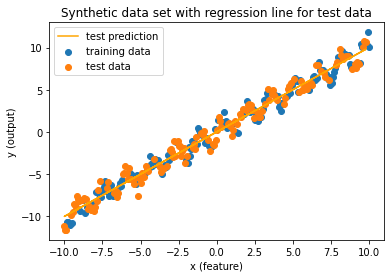

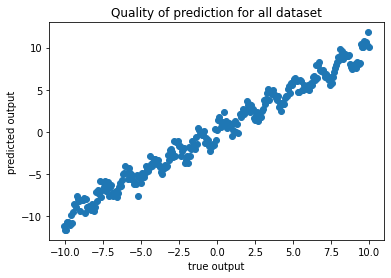

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, sine_wave, test_size=0.5)

X_train_feat = extract_polynomial_features(X_train, 1)
X_test_feat = extract_polynomial_features(X_test, 1)

model = LinearRegression()
model.fit(X_train_feat, y_train)

predict_train = model.predict(X_train_feat)
print(f'Error for training MSE: {model.get_error(predict_train, y_train, "MSE")}')
print(f'Error for training RMSE: {model.get_error(predict_train, y_train, "RMSE")}')

predict_test = model.predict(X_test_feat)
print(f'Error for testing MSE: {model.get_error(predict_test, y_test, "RMSE")}')
print(f'Error for testing RMSE: {model.get_error(predict_test, y_test, "RMSE")}')

plt.scatter(X_train, y_train, label="training data")
plt.xlabel("x (feature)")
plt.ylabel("y (output)")
plt.title("Synthetic data set with regression line for test data")
plt.plot(X_test, predict_test, label="test prediction", color="orange")
plt.scatter(X_test, y_test, label="test data")
#plt.plot(X_train, predict_train, label="trained prediction", color="red")
plt.legend()
plt.show()


X_feat = extract_polynomial_features(x, 1)
predict = model.predict(X_feat)
plt.scatter(predict, sine_wave)
plt.xlabel("true output")
plt.ylabel("predicted output")
plt.title("Quality of prediction for all dataset")
plt.show()


Expand features to polynomial form for a better fit

Error for training MSE: 0.7365668278256429
Error for training RMSE: 0.8582347160454668
Error for testing MSE: 0.8329443964665475
Error for testing RMSE: 0.9126578748175833


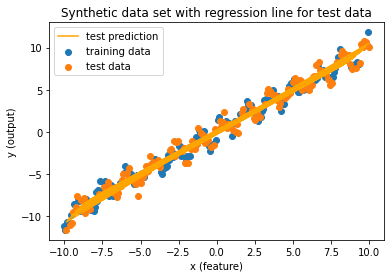

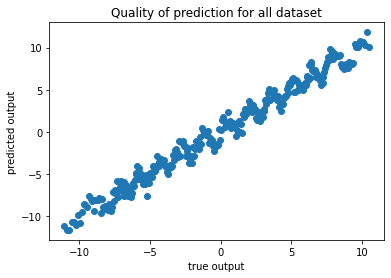

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, sine_wave, test_size=0.5)


M = 7 #@param {type: "slider", default: 8, min: 1, max: 15}
X_train_feat = extract_polynomial_features(X_train, M)
X_test_feat = extract_polynomial_features(X_test, M)

model = LinearRegression()
model.fit(X_train_feat, y_train)

predict_train = model.predict(X_train_feat)
print(f'Error for training MSE: {model.get_error(predict_train, y_train, "MSE")}')
print(f'Error for training RMSE: {model.get_error(predict_train, y_train, "RMSE")}')

predict_test = model.predict(X_test_feat)
print(f'Error for testing MSE: {model.get_error(predict_test, y_test, "MSE")}')
print(f'Error for testing RMSE: {model.get_error(predict_test, y_test, "RMSE")}')

plt.scatter(X_train, y_train, label="training data")
plt.xlabel("x (feature)")
plt.ylabel("y (output)")
plt.title("Synthetic data set with regression line for test data")
plt.plot(X_test, predict_test, label="test prediction", color="orange")
plt.scatter(X_test, y_test, label="test data")
#plt.plot(X_train, predict_train, label="trained prediction", color="red")
plt.legend()
plt.show()


X_feat = extract_polynomial_features(x, M)
predict = model.predict(X_feat)
plt.scatter(predict, sine_wave)
plt.xlabel("true output")
plt.ylabel("predicted output")
plt.title("Quality of prediction for all dataset")
plt.show()


Gradient Descent


In [ ]:
class LinearRegressionGD(object):

    def train(self, X, T, lr=.01, epochs_no=15):
      print("---- TRAINING STARTED ----")
      (N, D) = X.shape
      X_hat = np.concatenate([X, np.ones((N, 1))], axis=1)
      self.W = np.random.randn((D+1))
      self.t = T
      Y = np.zeros(N + 1)
      for epoch in range(epochs_no):
        Y = X_hat @ self.W
        self.W = self.W - lr * self.get_gradient(Y, T, X_hat)
        print(f'EPOCH: {epoch} => Error: {self.get_error(Y, T, "MSE")}')
      print("---- TRAINING ENDED ----")

    def get_gradient(self, Y, T, X):
      return (sum((y - t) * x for (y, t, x) in zip(Y, T, X)))

    def predict(self, X):
        X_hat = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
        self.y = X_hat @ self.W
        return self.y
    
    def get_error(self, predicted, true, type_error):
        if type_error == "MSE":
          return np.mean(np.square(predicted - true))
        if type_error == "RMSE":
          return np.sqrt(np.mean(np.square(predicted - true)))

    

Test Gradient Descent

---- TRAINING STARTED ----
EPOCH: 0 => Error: 5994.920031379127
EPOCH: 1 => Error: 2320.7059914646325
EPOCH: 2 => Error: 1127.930839410663
EPOCH: 3 => Error: 739.1270898367399
EPOCH: 4 => Error: 611.9928600057798
EPOCH: 5 => Error: 570.3223649267787
EPOCH: 6 => Error: 556.6394941375465
EPOCH: 7 => Error: 552.140498398108
EPOCH: 8 => Error: 550.6596953333662
EPOCH: 9 => Error: 550.1719292164636
EPOCH: 10 => Error: 550.0111702999677
EPOCH: 11 => Error: 549.9581643181058
EPOCH: 12 => Error: 549.9406813967759
EPOCH: 13 => Error: 549.9349136367601
EPOCH: 14 => Error: 549.933010464704
---- TRAINING ENDED ----


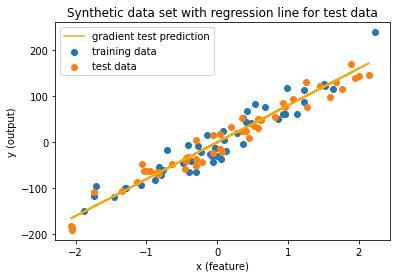

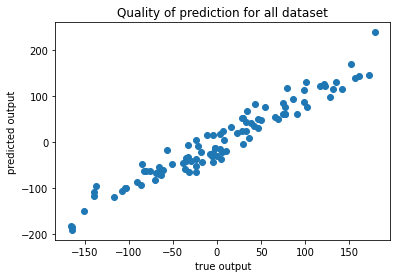

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

model = LinearRegressionGD()
model.train(X_train, y_train)


predict_train_GD = model.predict(X_train)
predict_test_GD = model.predict(X_test)






plt.scatter(X_train, y_train, label="training data")
plt.xlabel("x (feature)")
plt.ylabel("y (output)")
plt.title("Synthetic data set with regression line for test data")
plt.plot(X_test, predict_test_GD, label="gradient test prediction", color="orange")
plt.scatter(X_test, y_test, label="test data")
#plt.plot(X_train, predict_train, label="trained prediction", color="red")
plt.legend()
plt.show()


predict = model.predict(X)
plt.scatter(predict, y)
plt.xlabel("true output")
plt.ylabel("predicted output")
plt.title("Quality of prediction for all dataset")
plt.show()

